# Dublicate Question Pairs

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data/train.csv/train.csv')
df.shape

(404290, 6)

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
#duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

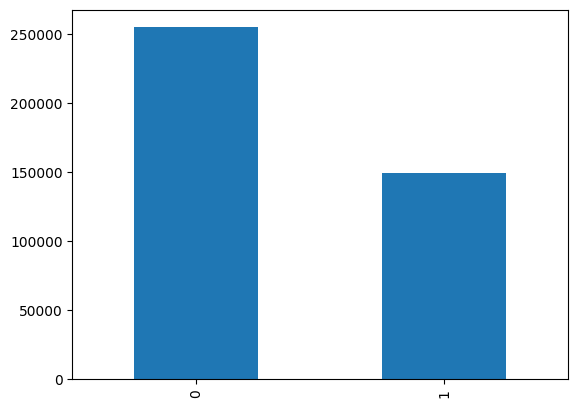

In [13]:
#Distribution of distributed and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [15]:
#Reapeated Questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


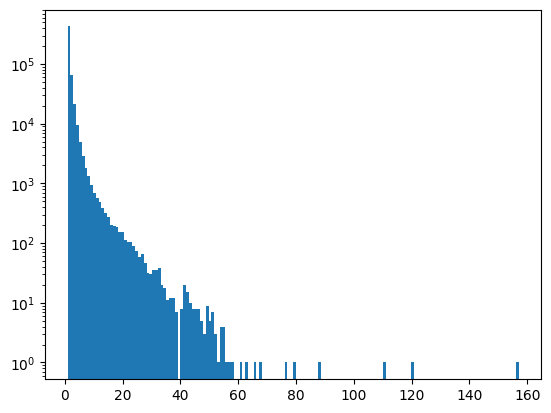

In [17]:
#Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [19]:
new_df = df.sample(30000)

In [21]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [23]:
new_df.duplicated().sum()

0

In [25]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
220341,What is the small thing that made you smile to...,What made you smile today?
56728,What is the power house of plant cell?,What is the power house of the cell?
86844,What is the most romantic poem ever written?,What are Balaji Vishwanathan's views on 'Hey R...
216744,Which code is better? The sith code or jedi code?,"In the Star Wars universe, why didn't the Jedi..."
337591,What is the best way to make money fast?,What is best way for earning money?


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# merge text
questions = list(ques_df['question1'])+list(ques_df['question2'])
cv  = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [31]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df= pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [33]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [35]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
220341,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
56728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.744

In [49]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.2/124.9 MB 2.5 MB/s eta 0:00:50
   ---------------------------------------- 0.7/124.9 MB 5.2 MB/s eta 0:00:25
   ---------------------------------------- 0.9/124.9 MB 5.2 MB/s eta 0:00:24
   ---------------------------------------- 1.1/124.9 MB 5.0 MB/s eta 0:00:25
   ---------------------------------------- 1.1/124.9 MB 5.0 MB/s eta 0:00:25
   ---------------------------------------- 1.1/124.9 MB 5.0 MB/s eta 0:00:25
   ---------------------------------------- 1.2/124.9 MB 3.3 MB/s eta 0:00:39
   ---------------------------------------- 1.4/124.9 MB 3.4 MB/s eta 0:00:37
    ---------------

In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.7208333333333333